In [6]:
import pandas as pd
import h5py
%matplotlib inline

# Link Corridor

In [7]:
# corridors using .in files
# df = pd.read_csv(r'R:\SoundCast\Inputs\2014\corridors\corridor_2.in', skiprows=1, skipinitialspace=True, sep=' ')
scen1 = pd.read_csv(r'R:\SoundCast\releases\soundcast_master_2010_fresh_56\outputs\corridor_summary.csv')
scen2 = pd.read_excel(r'U:\brice\soundcast_2040_with_2014_network\outputs\network_summary_detailed.xlsx', sheetname='Corridors')
scen3 = pd.read_excel(r'U:\brice\soundcast_2040_with_2014_network\outputs\network_summary_detailed.xlsx', sheetname='Corridors')

In [8]:
# merge two scenarios
scen1_name = '2014'
scen2_name = 'no_build_2040'
scen3_name = 'plan_2040'

# merge scen1 and scen2
df = pd.merge(scen1, scen2, on=['Corridor Input File','Local ID','full_id','tod'], suffixes=['_'+scen1_name, '_'+scen2_name])
# merge scen1,2 and 3
df = pd.merge(df, scen3, on=['Corridor Input File','Local ID','full_id','tod'])
df.rename(columns={'auto_time':'auto_time_'+scen3_name,'length':'length_'+scen3_name}, inplace=True)

df[['Local ID','full_id']] = df[['Local ID','full_id']].astype('int')

In [9]:
# Merge with observed
obs = pd.read_csv(r'C:\Users\Brice\corridor\corridor_travel_time.csv')
obs
df = pd.merge(df,obs,left_on=['Corridor Input File','Local ID','tod'], right_on=['corridor','direction','tod'])

# For validation
# import matplotlib.pyplot as plt
# maxtime = 60
# ax = df.plot(kind='scatter', x='auto_time', y='observed_time_2010', xlim=[0,maxtime], ylim=[0,maxtime])

# # reference line 
# ref = pd.DataFrame([0,maxtime],[0,maxtime])
# ref.plot(ax=ax)

In [10]:
compare_df = df[['auto_time_'+scen1_name,'auto_time_'+scen2_name]]
compare_df['Change (minutes)'] = compare_df['auto_time_'+scen2_name] - compare_df['auto_time_'+scen1_name]
compare_df['% Change'] = (compare_df['auto_time_'+scen2_name] - compare_df['auto_time_'+scen1_name])/compare_df['auto_time_'+scen1_name]
compare_df.head()

,auto_time_2014,auto_time_no_build_2040,Change (minutes),% Change
0,35.237630,47.523288,12.285658,0.348652
1,54.056804,69.052686,14.995881,0.277410
2,39.721719,52.351540,12.629821,0.317958
3,27.292626,30.162645,2.870019,0.105157
4,18.107119,23.177765,5.070646,0.280036


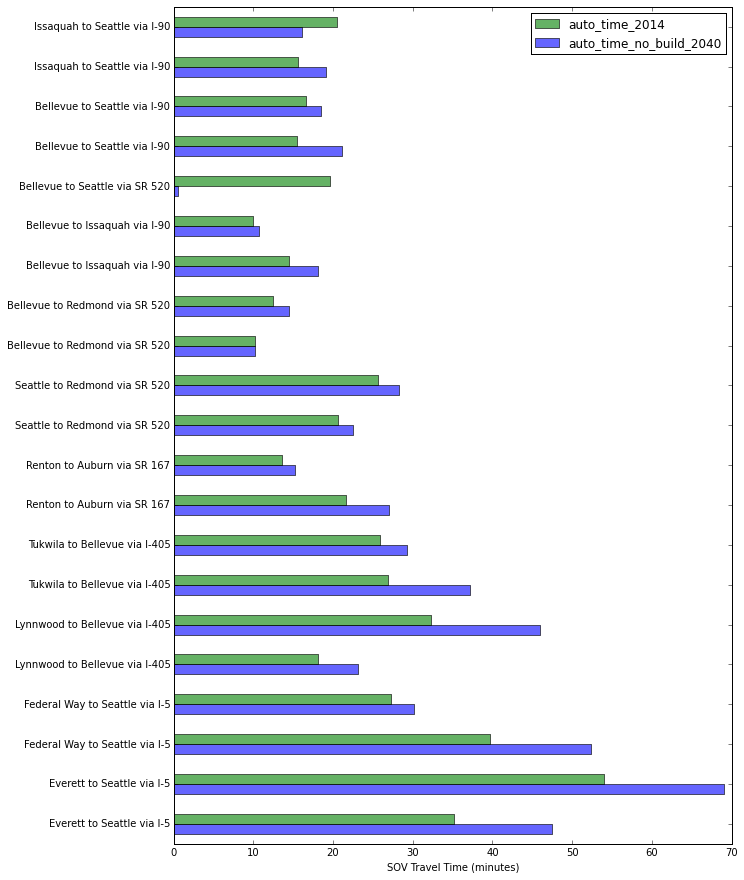

In [11]:
df.index = df.description
ax = df[['auto_time_'+scen2_name,'auto_time_'+scen1_name]].plot(kind='barh', figsize=(10,15), alpha=0.6, legend=['a','b'])

# Change order of labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')  # reverse both handles and labels
ax.yaxis.label.set_visible(False)    # hide y axis labels
ax.set_xlabel('SOV Travel Time (minutes)')

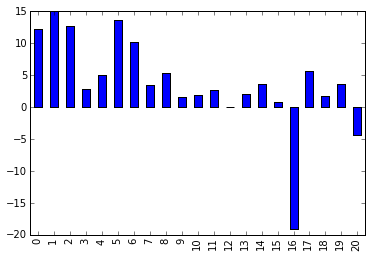

In [12]:
compare_df['Change (minutes)'].plot(kind='bar')

# O-D Corridor

In [13]:
# Load observed data (2017)
obs = pd.read_csv(r'C:\Users\Brice\corridor\corridor_travel_times.csv')

obs

,time,dist,dtaz,time_cong,time_ff,otaz,description
0,8,15.714473,1356,17.716667,19.500000,532,Seattle-Renton
1,8,11.021257,1552,14.533333,16.033333,532,Seattle-Bellevue
2,8,29.367858,2266,31.200000,33.366667,532,Seattle-Everett
3,8,32.096919,2899,31.200000,33.283333,532,Seattle-Tacoma
4,8,11.171629,532,13.950000,15.233333,1552,Bellevue-Seattle
5,8,10.222174,1356,13.550000,14.950000,1552,Bellevue-Renton
6,8,28.788118,2266,31.116667,33.000000,1552,Bellevue-Everett
7,8,15.226075,532,17.233333,19.033333,1356,Renton-Seattle
8,8,10.523539,1552,14.500000,16.683333,1356,Renton-Bellevue
9,8,25.413453,2899,26.033333,27.616667,1356,Renton-Tacoma


In [66]:
skim_name = '7to8'
h5_contents = h5py.File(skims_dir + r'\\' + skim_name + '.h5')
user_class = 'svtl1t'
scen_name = '2014'
zone_list = [532,1552,1356]
results = pd.DataFrame()
run_dict = {r'U:\\brice\\soundcast_2040_with_2014_network': 'no_build',
           r'S:\\brice\\soundcast_2040_feb14_17': 'plan'}

for run_dir, run_name in run_dict.iteritems():
    print run_dir
    skims_dir = run_dir + r'\inputs'
    h5_contents = h5py.File(skims_dir + r'\\' + skim_name + '.h5')
    for zone in zone_list:
        df = pd.DataFrame()
        df[user_class] = h5_contents['Skims'][user_class][:][zone-1,:max_internal_zone]
        df['otaz'] = zone
        df['dtaz'] = df.index+1
        df['travel_time'] = df[user_class]/100 # skim data is stored in hundreds
        
         #     # Subtract the terminal times
    #     df = pd.merge(df,o_tt,left_on='dtaz',right_on='taz')
    #     # Subtract destination terminal time
    #     df['travel_time'] = df['travel_time']-df['terminal_time']
    #     # Subtract origin terminal time
    #     df['travel_time'] = df['travel_time']-(o_tt[o_tt['taz'] == origin_zone]['terminal_time'].values[0])
        
        df = df[df['dtaz'].isin(dest_zones)]
        
        df['source'] = run_name
        results = results.append(df)

U:\\brice\\soundcast_2040_with_2014_network
S:\\brice\\soundcast_2040_feb14_17


In [67]:
# results

In [77]:
scen1 = results[results['source'] == 'no_build'][['travel_time','otaz','dtaz']]
scen2 = results[results['source'] == 'plan'][['travel_time','otaz','dtaz']]

df = pd.merge(scen1, scen2, on=['otaz','dtaz'], suffixes=['_no_build','_plan'])

In [78]:
df = pd.merge(df, obs[['otaz','dtaz','description','time_cong']], on=['otaz','dtaz'])
df.index = df['description']

## AM Travel Times

In [92]:
df[['description','travel_time_no_build','travel_time_plan']]

,description,travel_time_no_build,travel_time_plan
description,,,
Seattle-Renton,Seattle-Renton,31.17,29.29
Seattle-Bellevue,Seattle-Bellevue,33.04,28.62
Bellevue-Renton,Bellevue-Renton,27.73,19.61
Renton-Bellevue,Renton-Bellevue,37.72,26.23


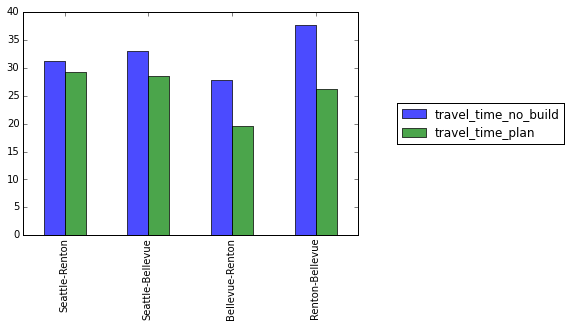

In [90]:

ax = df[['travel_time_no_build','travel_time_plan']].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")

In [95]:
df.rename(columns={'time_cong':'today',
                  'travel_time_no_build': 'no_build',
                  'travel_time_plan': 'plan'},inplace=True)
df[['description','no_build','plan','today']]

,description,no_build,plan,today
description,,,,
Seattle-Renton,Seattle-Renton,31.17,29.29,17.716667
Seattle-Bellevue,Seattle-Bellevue,33.04,28.62,14.533333
Bellevue-Renton,Bellevue-Renton,27.73,19.61,13.550000
Renton-Bellevue,Renton-Bellevue,37.72,26.23,14.500000


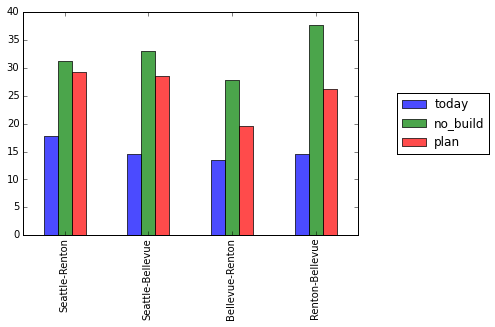

In [104]:
ax = df[['description','today','no_build','plan']].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")